In [1]:
# change to local directory
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Demo capstone/Visualization")

In [2]:
import nltk
nltk.download('punkt') # one time execution
nltk.download('stopwords')

import string
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import time
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
txt = """U.S. Secretary of State Antony Blinken (2nd R), joined by national security advisor Jake Sullivan (R), speaks while facing Yang Jiechi (2nd L), director of the Central Foreign Affairs Commission Office, and Wang Yi (L), China's foreign minister at the opening session of U.S.-China talks at the Captain Cook Hotel in Anchorage, Alaska on March 18, 2021. Frederic J. Brown | AFP | Getty Images

BEIJING — The first high-level gathering of U.S. and Chinese officials under President Joe Biden kicked off with an exchange of insults at a pre-meeting press event in Alaska on Thursday. A planned four-minute photo session for the officials to address reporters ended up lasting one hour and 15 minutes due to a frothy exchange, according to NBC News. Both the Chinese and U.S. side kept calling the reporters back into the room so they could add remarks. Expectations were already low for the meeting in Anchorage, Alaska, with U.S. Secretary of State Antony Blinken, National Security Advisor Jake Sullivan, Chinese Foreign Minister Wang Yi and Yang Jiechi, director of the Central Foreign Affairs Commission of the Chinese Communist Party. In his opening remarks, Blinken said the U.S. would discuss its "deep concerns with actions by China, including in Xinjiang, Hong Kong, Taiwan, cyber attacks on the United States, economic coercion toward our allies." "Each of these actions threaten the rules-based order that maintains global stability. That's why they're not merely internal matters, and why we feel an obligation to raise these issues here today," Blinken said. "I said that the United States relationship with China will be competitive where it should be, collaborative where it can be, adversarial where it must be."

The United States does not have the qualification to say that it wants to speak to China from a position of strength. Yang Jiechi director of the Central Foreign Affairs Commission

Beijing considers issues in Xinjiang, Hong Kong and Taiwan as part of its domestic affairs, and the officials reiterated at the meeting that China is firmly opposed to foreign interference. Yang said the U.S. side "carefully orchestrated" the dialogue, according to an official translation reported by NBC. "I think we thought too well of the United States, we thought that the U.S. side will follow the necessary diplomatic protocols," Yang said, adding that "the United States does not have the qualification to say that it wants to speak to China from a position of strength." Yang said the U.S. must deal with the Chinese side in "the right way" and reiterated Beijing's call for cooperation.

I'm hearing deep satisfaction that the United States is back, that we're reengaged with our allies and partners. I'm also hearing deep concern about some of the actions your government is taking. Antony Blinken U.S. Secretary of State

Under Chinese President Xi Jinping, the Chinese government has been consolidating its power at home and abroad. In the last year, Beijing has pushed ahead with major trade deals with Asia-Pacific neighbors and the European Union. Chinese authorities have also emphasized their success in quickly controlling the coronavirus pandemic domestically, and their claim of lifting all 1.4 billion people in the country out of poverty — both of which Yang pointed to in his meeting with U.S. officials. "We believe that it is important for the United States to change its own image, and to stop advancing its own democracy in the rest of the world," Yang said. China's Ministry of Foreign Affairs did not immediately have a comment. State-run broadcaster CCTV said the U.S. went "seriously overtime" in its opening remarks and "provoked disputes," according to a CNBC translation of the Mandarin-language report.
"""

### Most frequent words visualization

In [4]:
def most_frequent_viz(txt, num_result = 30):
    """get the most frequent words viz

    Args:
        txt (str): the string we try to plot
        num_result (int, optional): number of bars (number of most frequent words). Defaults to 30.

    Returns:
        file location (str)
    """  
    # prep text: lower, split by words, and remove punctuation
    txt = txt.translate(str.maketrans(' ', ' ', string.punctuation + "”“-_"))
    txt = txt.lower()
    word_list = word_tokenize(txt)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned = []
    for val in word_list:
      if val not in stop_words and len(val) > 1:
        cleaned.append(val)

    # get the most frequent words by using Counter: key: word, value: number of ocurrence
    word_freq = Counter(cleaned)

    x = word_freq.most_common(num_result)
    print(x)
    # plot
    plt.figure(figsize=(12,8))
    plt.bar(range(num_result), np.array(x).T[1].astype('int'))
    plt.xticks(range(num_result), np.array(x).T[0], rotation='vertical')
    plt.xlabel('Word')
    plt.ylabel('Count')
    plt.title('Most frequent words')
    plt.show()

[('us', 11), ('yang', 8), ('chinese', 8), ('said', 8), ('foreign', 7), ('united', 7), ('states', 7), ('blinken', 5), ('affairs', 5), ('china', 5), ('officials', 4), ('side', 4), ('secretary', 3), ('state', 3), ('antony', 3), ('jiechi', 3), ('director', 3), ('central', 3), ('commission', 3), ('opening', 3), ('alaska', 3), ('beijing', 3), ('according', 3), ('remarks', 3), ('meeting', 3), ('deep', 3), ('actions', 3), ('2nd', 2), ('national', 2), ('security', 2)]


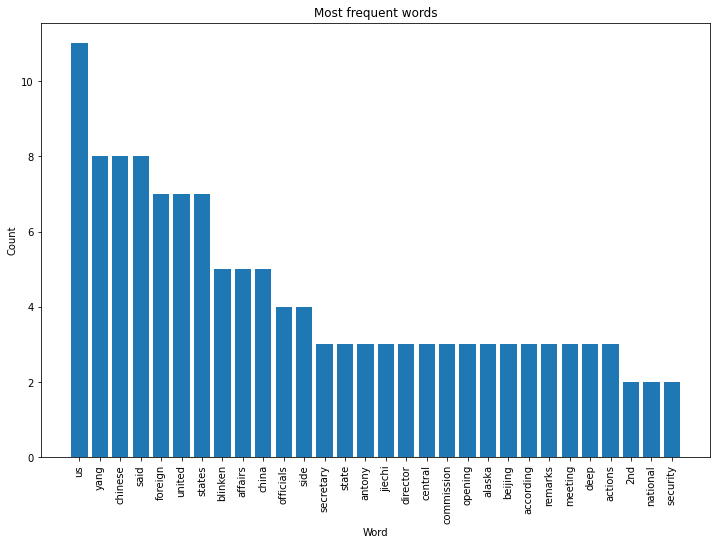

In [5]:
most_frequent_viz(txt)

### Word cloud Visualization

In [6]:
def wordcloud_viz(txt):
    """plot word cloud

    Args:
      txt (str): text for plot
      name (str) file name

    Returns:
      file location
    """  
    txt = txt.lower()
    mpl.rcParams['font.size']=12                #10
    mpl.rcParams['savefig.dpi']=100             #72
    mpl.rcParams['figure.subplot.bottom']=.1

    # get stopwords to remove
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        random_state=42
        ).generate(txt)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

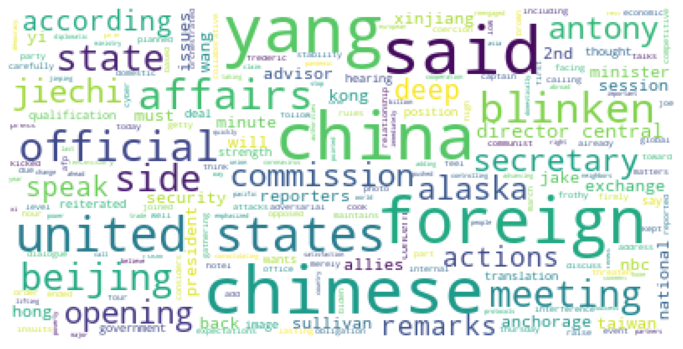

In [7]:
wordcloud_viz(txt)